#### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex (binary: "F" - female or "M" - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: "U" - urban or "R" - rural)
5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. guardian - student's guardian (nominal: "mother", "father" or "other")
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - 1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

### these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.


Primero importamos las librerias, y los ficheros a leer, la anotación de %matplotlib inline es para que muestre las gráficas en el cuaderno.

Por último, realizamos un primer analisis observando si el tamaño de las tablas tiene relación y observamos que coinciden el numero de columnas.

Posteriormente con head(), vemos un pequeño resumen de los datos que contienen las tablas.

In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import matplotlib.pyplot as plt

data_mat = pd.read_csv('./student-mat.csv',delimiter=';')
data_por = pd.read_csv('./student-por.csv',delimiter=';')

print(data_mat.shape)
print(data_por.shape)

(395, 33)
(649, 33)


In [2]:
data_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Realizamos la misma operación que nos indica el archivo .R, que es unir las tablas

In [4]:

data = pd.concat([data_por,data_mat])
data = data.drop_duplicates(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

Revisamos que tipos de variables contiene la tabla. Y con describe realizamos un primer examen sobre el contenido de los datos, con medias, máximos, minimos, etc...

In [5]:
print(data.shape)
data.info()
data.describe()

(662, 33)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 394
Data columns (total 33 columns):
school        662 non-null object
sex           662 non-null object
age           662 non-null int64
address       662 non-null object
famsize       662 non-null object
Pstatus       662 non-null object
Medu          662 non-null int64
Fedu          662 non-null int64
Mjob          662 non-null object
Fjob          662 non-null object
reason        662 non-null object
guardian      662 non-null object
traveltime    662 non-null int64
studytime     662 non-null int64
failures      662 non-null int64
schoolsup     662 non-null object
famsup        662 non-null object
paid          662 non-null object
activities    662 non-null object
nursery       662 non-null object
higher        662 non-null object
internet      662 non-null object
romantic      662 non-null object
famrel        662 non-null int64
freetime      662 non-null int64
goout         662 non-null int64
Dalc      

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,16.812689,2.492447,2.293051,1.566465,1.929003,0.259819,3.941088,3.187311,3.173716,1.506042,2.287009,3.533233,3.891239,11.404834,11.530211,11.842900
std,1.269194,1.130958,1.094027,0.744699,0.826621,0.628750,0.935679,1.057195,1.161031,0.926559,1.290878,1.435854,5.140708,2.758429,2.940380,3.298939
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,40.000000,19.000000,19.000000,19.000000


Revisamos la forma de la distribución de las calificaciones, y observamos que todas son bastante similares.

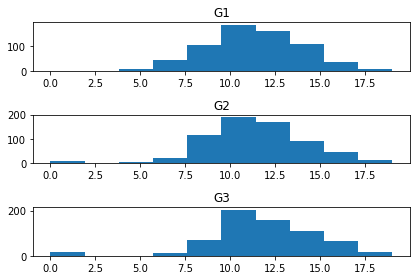

In [6]:
grades=["G1","G2","G3"]
i = 1
for w in grades:
    plt.subplot(3, 1, i)
    plt.tight_layout()
    i += 1
    plt.hist(data[w])
    plt.title(w)

Imprimimos los datos en un gráfico para observar si esa correlación es entre individuos o no. Observamos que efectivamente, guardan gran similitud no solo en el histograma.

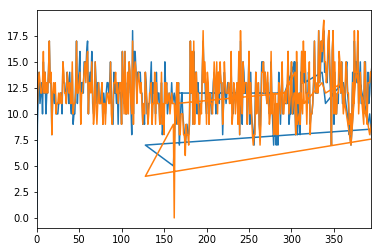

In [7]:
data["G1"].plot()
data["G2"].plot()

Ahora realizo una tabla de correlaciones, analizo la correlación entre el consumo semanal de alcochol y otros factores y observamos qe es inferior a 0.20, por lo cual muy baja correlación (por no decir inexistente)

In [8]:
corr = data.corr()

In [9]:
correlated_data = data.corr().abs()

os = (correlated_data.where(np.triu(np.ones(correlated_data.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
os['Dalc']


Walc        0.615797
G3          0.208553
G1          0.202212
G2          0.194142
absences    0.129726
health      0.066372
dtype: float64

In [10]:
os['Walc']

G3          0.186917
G2          0.174871
G1          0.172461
health      0.122992
absences    0.105249
dtype: float64

Ordenamos las correlaciones de la tabla para observar cuales son las mayores. Al principios nos aparecen las de la diagonal ( unas son ellas mismas) las cuales descartamos.

Las siguientes, son las diferentes calificaciones entre ellas, las cuales hemos observado anteriormente. A continuación observamos cierta correlación (aunque baja) Entre el nivel de educacion de los progenitores y también entre el consumo semanal de alcohol y el diario.

Primero hicimos un analisis sobre la muestra sin modificar, y luego lo realizamos utilizando la función dummy para convertir valores de cadenas de texto en valores de 1 - 0.

In [11]:
s = correlated_data.unstack()
so = s.sort_values(kind="quicksort",ascending=False)

print(so)

G3          G3            1.000000
G2          G2            1.000000
Medu        Medu          1.000000
Fedu        Fedu          1.000000
traveltime  traveltime    1.000000
studytime   studytime     1.000000
failures    failures      1.000000
famrel      famrel        1.000000
freetime    freetime      1.000000
goout       goout         1.000000
Dalc        Dalc          1.000000
Walc        Walc          1.000000
health      health        1.000000
absences    absences      1.000000
G1          G1            1.000000
age         age           1.000000
G2          G3            0.915835
G3          G2            0.915835
G2          G1            0.859295
G1          G2            0.859295
            G3            0.817636
G3          G1            0.817636
Fedu        Medu          0.635156
Medu        Fedu          0.635156
Dalc        Walc          0.615797
Walc        Dalc          0.615797
G3          failures      0.404783
failures    G3            0.404783
Walc        goout   

In [12]:
dummy_data = pd.get_dummies(data)
dummy_data
dummy_corr = dummy_data.corr().abs()
s_d = dummy_corr.unstack()
so_d = s_d.sort_values(kind="quicksort",ascending=False)
so_d[85:120]

G3                 G2                   0.915835
G2                 G3                   0.915835
                   G1                   0.859295
G1                 G2                   0.859295
                   G3                   0.817636
G3                 G1                   0.817636
guardian_father    guardian_mother      0.803735
guardian_mother    guardian_father      0.803735
Fjob_services      Fjob_other           0.704856
Fjob_other         Fjob_services        0.704856
Medu               Fedu                 0.635156
Fedu               Medu                 0.635156
Dalc               Walc                 0.615797
Walc               Dalc                 0.615797
reason_course      reason_home          0.477022
reason_home        reason_course        0.477022
reason_course      reason_reputation    0.472928
reason_reputation  reason_course        0.472928
guardian_mother    guardian_other       0.451893
guardian_other     guardian_mother      0.451893
Mjob_teacher       M

Por todo lo anterior podemos observar que no hay relación entre el consumo de alcohol y un empeoramiento del rendimiento escolar es más, observamos que realmente lo unico que tiene una relación fuerte con el resultado académico son las notas de las diferentes evaluaciones. El resto de analisis que se puedan realizar, son generalizaciones a partir de la muestra, como observar si el consumo es más alto en hombre que en mujeres, si el absentismo es superior en edades más avanzadas y asi todas las relaciones entre variables que queramos revisar.


In [13]:
data_female = data.query('sex == "F"')
data_male = data.query('sex == "M"')

In [15]:
m_walc_mean = data_male['Walc'].mean()
fem_walc_mean = data_female['Walc'].mean()
m_dalc_mean = data_male['Dalc'].mean()
fem_dalc_mean = data_female['Dalc'].mean()

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

trace1 = go.Bar(
    x=['Hombres', 'Mujeres'],
    y=[m_walc_mean,fem_walc_mean],
    name='Consumo Medio Semanal'
)
trace2 = go.Bar(
    x=['Hombres', 'Mujeres'],
    y=[m_dalc_mean,fem_dalc_mean],
    name='Consumo Medio Diario'
)

data2plot = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data2plot, layout=layout)
iplot(fig, filename='grouped-bar')

<img src="alc_sex_relation.png"  alt="Drawing" style="width: 800px;">

In [16]:
ages = list(range(15, 23))
absences_age = []

for age in ages:
    absences_age.append((data.query('age == '+str(age))['absences']).mean())

plotdata = [go.Bar(
            x=ages,
            y=absences_age
    )]

iplot(plotdata, filename='basic-bar')

<img src="age_absences.png"  alt="Drawing" style="width: 800px;">